## Projeto 04 - Ténicas de Programação II

**Sobre o dataset**

- Título: Personal Key Indicators of Heart Disease
- Fonte: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

**Variáveis**
- HeartDisease: Os entrevistados que já relataram ter doença cardíaca coronária (DAC) ou infarto do miocárdio (IM).
- BMI: Índice de Massa Corporal (IMC).
- Smoking: Você fumou pelo menos 100 cigarros em toda a sua vida?
- AlcoholDrinking: bebedores pesados ​​(homens adultos que bebem mais de 14 bebidas por semana e mulheres adultas que bebem mais de 7 bebidas por semana
- Stroke: (Já disse ter) (você teve) um derrame?
- PhysicalHealth: Agora, pensando em sua saúde física, que inclui doenças e lesões físicas, por quantos dias nos últimos 30 dias sua saúde física não foi boa? (0-30 dias).
- MentalHealth: Pensando em sua saúde mental, por quantos dias nos últimos 30 dias sua saúde mental não foi boa? (0-30 dias).
- DiffWalking: Você tem sérias dificuldades para caminhar ou subir escadas?
- Sex: Você é homem ou mulher?
- AgeCategory: categoria de idade de quatorze níveis. (então calculou a média)
- Race: valor de raça/etnia imputado.
- Diabetic: (Já disse ter) (você tinha) diabetes?
- PhysicalActivity: Adultos que relataram ter feito atividade física ou exercício nos últimos 30 dias fora do trabalho regular.
- GenHealth: Você diria que em geral sua saúde é...
- SleepTime: Em média, quantas horas de sono você dorme em um período de 24 horas?
- Asthma: (Já disse ter) (você teve) asma?
- KidneyDisease: Não incluindo cálculos renais, infecção da bexiga ou incontinência, você já foi informado de que tinha doença renal?
- SkinCancer: (Já disse ter) (você teve) câncer de pele?

**Visão Geral**

Pesquisa do CDC de 2020 com 400 mil adultos, sobre saúde. A motivação é que pelo menos metade dos estadunidenses possuem pelo menos 1 dos 3 fatores de risco para possuir uma doença cardíaca: pressão alta, colesterol alto e tabagismo.
O conjunto original possuia 300 variáveis, mas no DF atual só possui 20, entre elas 9 variáveis booleanas, 5 strings e 4 decimais.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Conhecendo e tratando a base de dados
**Verificando as distribuições de cada variável**

In [2]:
df_raw = pd.read_csv("./data/heart_2020_cleaned.csv")
df_raw.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
# Trocando "Yes" por True e "No" por False
def yes_no_bool(s: str):
    if s == "Yes": return True
    elif s == "No": return False
    else: return s

df_raw = df_raw.applymap(yes_no_bool)
df_raw.replace({'Diabetic': {'No, borderline diabetes': False}}, inplace=True)
df_raw.replace({'Diabetic': {'Yes (during pregnancy)': True}}, inplace=True)
df_raw.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,16.60,True,False,False,3.0,30.0,False,Female,55-59,White,True,True,Very good,5.0,True,False,True
1,False,20.34,False,False,True,0.0,0.0,False,Female,80 or older,White,False,True,Very good,7.0,False,False,False
2,False,26.58,True,False,False,20.0,30.0,False,Male,65-69,White,True,True,Fair,8.0,True,False,False
3,False,24.21,False,False,False,0.0,0.0,False,Female,75-79,White,False,False,Good,6.0,False,False,True
4,False,23.71,False,False,False,28.0,0.0,True,Female,40-44,White,False,True,Very good,8.0,False,False,False


In [4]:
df_raw.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  bool   
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  bool   
 3   AlcoholDrinking   319795 non-null  bool   
 4   Stroke            319795 non-null  bool   
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  bool   
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  bool   
 12  PhysicalActivity  319795 non-null  bool   
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  bool   
 16  KidneyDisease     31

### Verificando a frequência de cada variável

,Falsos (%),Verdadeiros (%)
HeartDisease,91.440454,8.559546
Smoking,58.752326,41.247674
AlcoholDrinking,93.190325,6.809675
Stroke,96.226020,3.773980
DiffWalking,86.112979,13.887021
Diabetic,86.441001,13.558999
PhysicalActivity,22.463766,77.536234
Asthma,86.593912,13.406088
KidneyDisease,96.316703,3.683297
SkinCancer,90.675589,9.324411


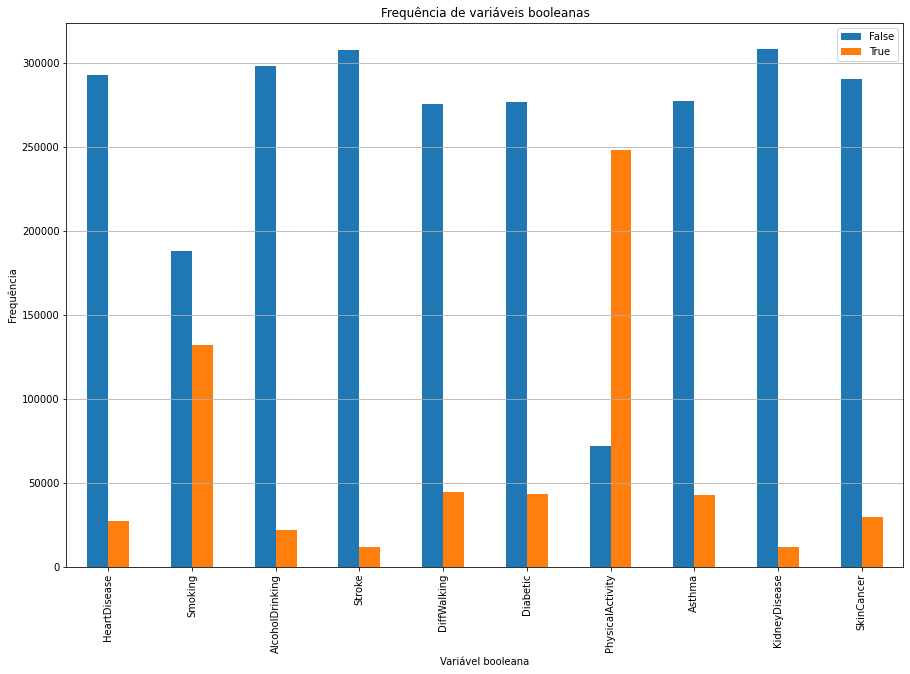

In [6]:
# Setting font size
plt.rcParams["font.size"] = 12

# Selecting only booleans and counting them
df_booleans = df_raw.select_dtypes(include=['bool'])
df_booleans = df_booleans.apply(pd.Series.value_counts).T

ax = df_booleans.plot(kind='bar', figsize=(15,10))
ax.set_title("Frequência de variáveis booleanas")
ax.set_xlabel("Variável booleana")
ax.set_ylabel("Frequência")
ax.grid(axis="y")

# Displaying dataframe
df_booleans = df_booleans/df_raw.shape[0]
df_booleans.columns = ["Falsos (%)", "Verdadeiros (%)"]
display(df_booleans*100)

plt.show()

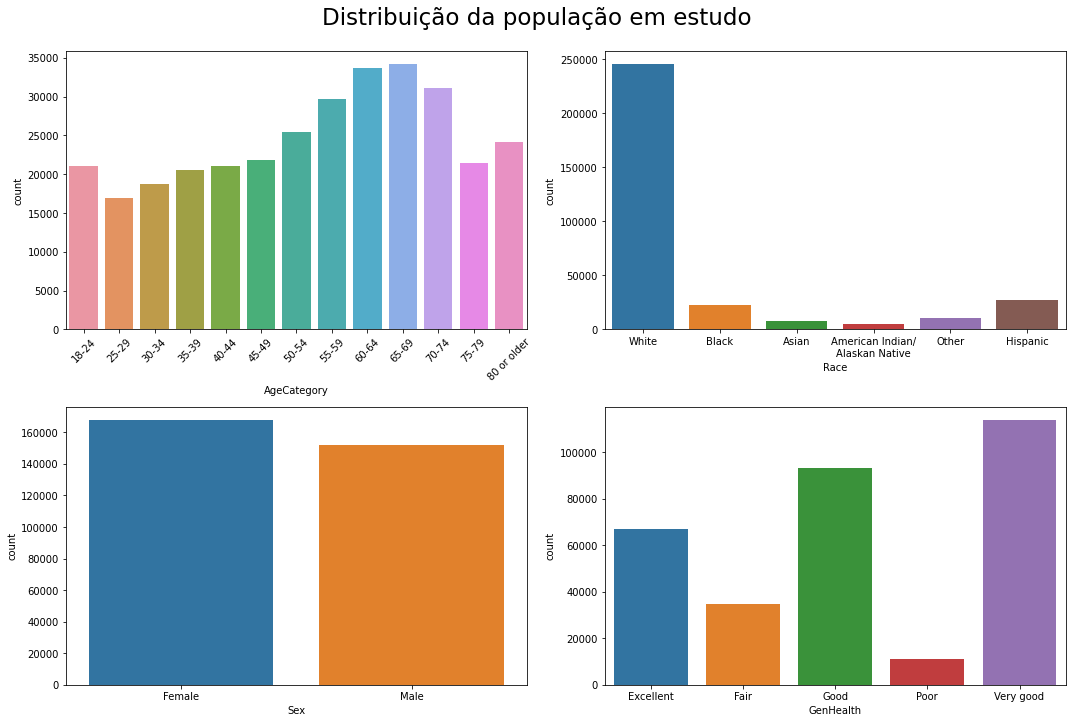

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Distribuição da população em estudo', fontsize = 23, y = 1.0)

f1 = sns.countplot(x = df_raw.sort_values('AgeCategory')['AgeCategory'], ax=ax[0][0])
f1.set_xticklabels(labels=df_raw.sort_values('AgeCategory')['AgeCategory'].unique(), rotation=45)

f2 = sns.countplot(x = df_raw['Race'], ax=ax[0][1])
f2.set_xticklabels(labels=['White', 'Black', 'Asian', 'American Indian/\nAlaskan Native','Other', 'Hispanic']) 

f3 = sns.countplot(x = df_raw['Sex'], ax=ax[1][0])
f3.set_xticklabels(labels=df_raw['Sex'].unique()) 

f4 = sns.countplot(x = df_raw.sort_values('GenHealth')['GenHealth'], ax=ax[1][1])
f4.set_xticklabels(labels=df_raw.sort_values('GenHealth')['GenHealth'].unique())

fig.tight_layout()
plt.show()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


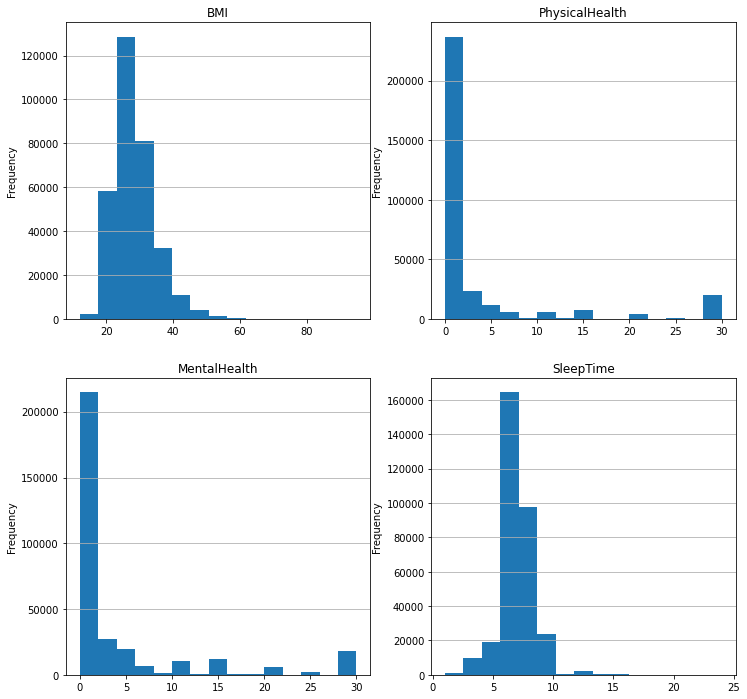

In [8]:
df_floats = df_raw.select_dtypes(include=['float'])
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for ax, col in zip(axs.flatten(), df_floats.columns):
    df_raw[col].plot(kind="hist", ax=ax, title=col, bins=15)
    ax.grid(axis="y")

df_floats.describe()

De acordo com a [BVS](https://aps.bvs.br/apps/calculadoras/?page=6) (Biblioteca Virtual em Saúde), temos os seguintes valores de referência:

|IMC|Diagnóstico|
|:-|:-|
|menor que 18,5| 	baixo peso|
|entre 18,5 e 24,9| 	intervalo normal|
|entre 25 e 29,9| 	sobrepeso|
|entre 30 e 34,9| 	obesidade classe I|
|entre 35 e 39,9| 	obesidade classe II|
|maior que 40| 	obesidade classe III|

Assim, a média dos pacientes possui sobrepeso.

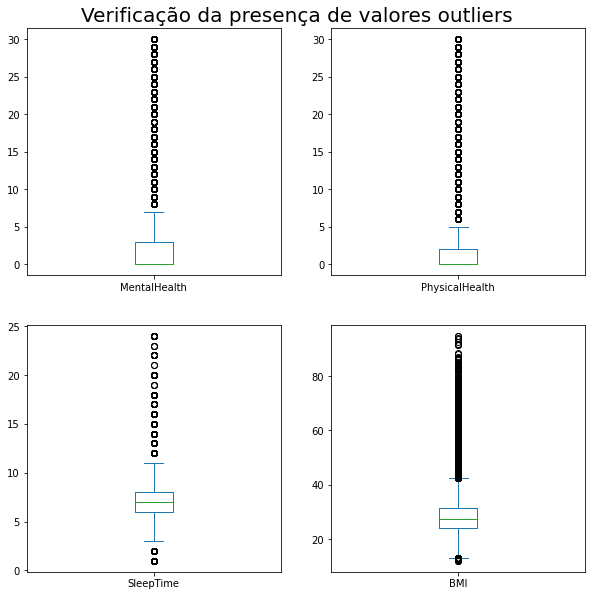

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

fig.suptitle('Verificação da presença de valores outliers', fontsize = 20, y = 0.91)

f1 = df_raw['MentalHealth'].plot(kind = 'box', ax=axs[0][0])
f2 = df_raw['PhysicalHealth'].plot(kind = 'box', ax=axs[0][1])
f3 = df_raw['SleepTime'].plot(kind = 'box', ax=axs[1][0])
f4 = df_raw['BMI'].plot(kind = 'box', ax=axs[1][1])

plt.show()

In [21]:
df_temp = df_floats.copy()
df_temp["dummy"] = 0

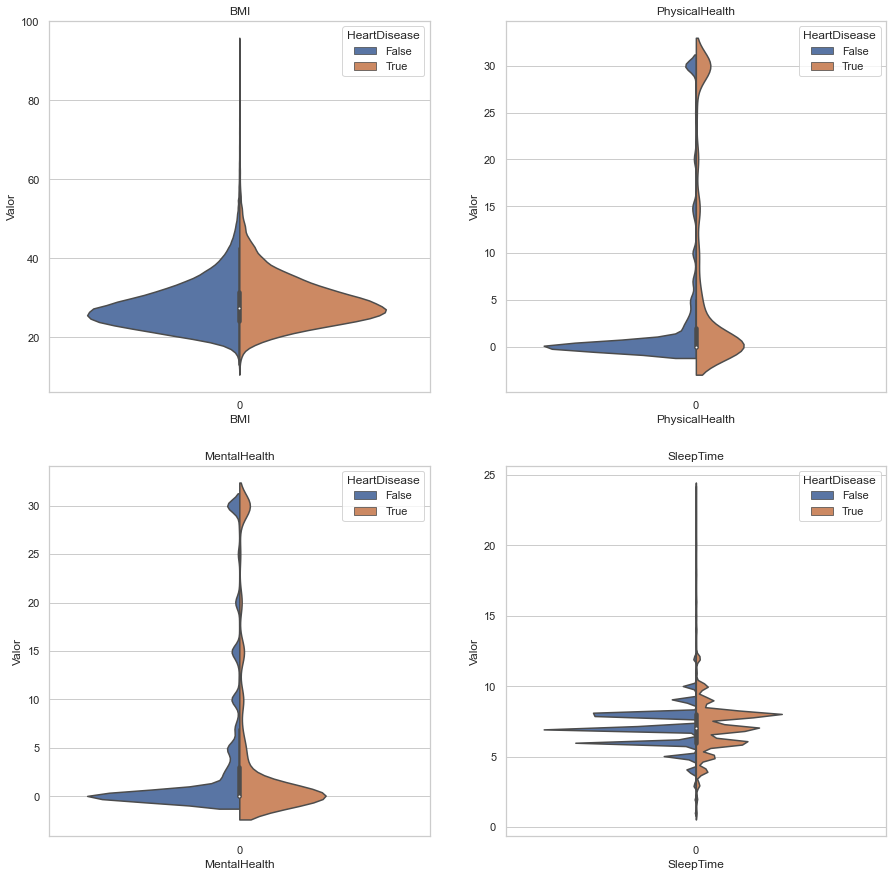

In [35]:
columns_to_plot = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for ax, col in zip(axs.flat, columns_to_plot):
    sns.violinplot(
        data=df_temp,
        x="dummy",
        y=col,
        hue="HeartDisease",
        split=True,
        ax=ax
    )
    ax.set_xlabel(col)
    ax.set_ylabel("Valor")
    ax.set_title(col)

plt.show()

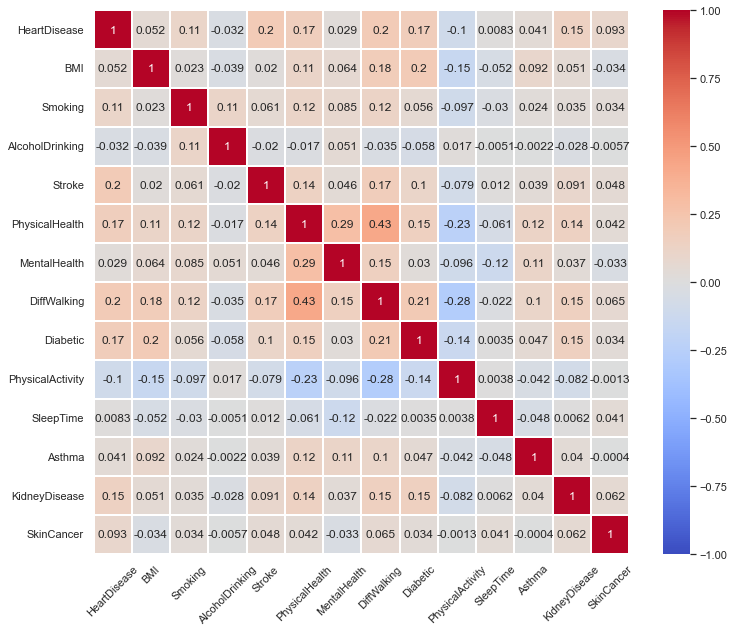

In [13]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(
    df_raw.corr(),
    annot=True,
    cmap="coolwarm",
    linewidths=0.1,
    fmt=".2g",
    vmin=-1,
    vmax=1
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

"The original dataset of nearly 300 variables was reduced to just about 20 variables."

In [15]:
sns.pairplot(df_floats, hue="HeartDisease")

In [16]:
sort_age = df_raw.sort_values('AgeCategory') 

px.histogram(sort_age[sort_age['HeartDisease']], 'AgeCategory', nbins=50, histnorm='probability density')

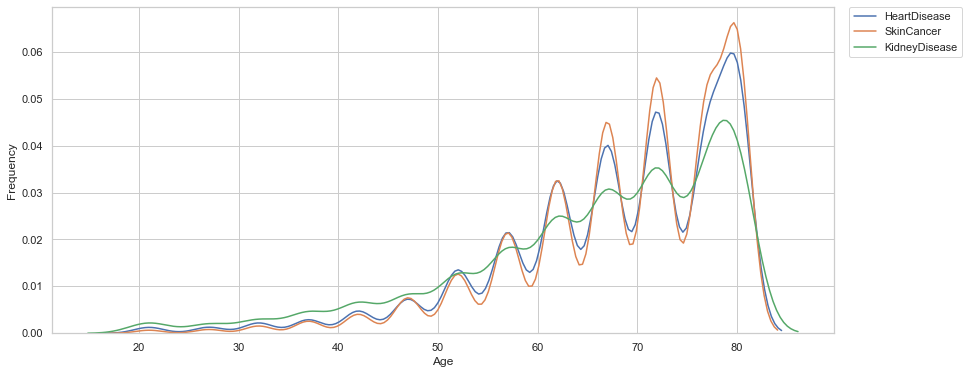

In [17]:
# Turning ages categories to numeric values
age_mapper = {
    '55-59':57, 
    '80 or older':80, 
    '65-69':67,
    '75-79':77,
    '40-44':42,
    '70-74':72,
    '60-64':62,
    '50-54':52,
    '45-49':47,
    '18-24':21,
    '35-39':37,
    '30-34':32,
    '25-29':27
}
df_ages = df_raw.copy()
df_ages["AgeCategory"] = df_ages["AgeCategory"].replace(age_mapper)

fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(df_ages[df_ages["HeartDisease"]]["AgeCategory"], alpha=1, shade = False, label="HeartDisease", ax=ax)
sns.kdeplot(df_ages[df_ages["SkinCancer"]]["AgeCategory"], alpha=1, shade = False, label="SkinCancer", ax=ax)
sns.kdeplot(df_ages[df_ages["KidneyDisease"]]["AgeCategory"], alpha=1, shade = False, label="KidneyDisease", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()